<a href="https://colab.research.google.com/github/git-shashank-hp/Algorithm-Notes-in-Pyhton/blob/main/CCFD_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/gdrive


In [2]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/CCDP/fraudTrain.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Check the shape (rows and columns)
print(df.shape)


# Get summary statistics for numeric columns
print(df.describe())


(1296675, 23)
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.

In [8]:
df['trans_date_trans_time']= pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] =pd.to_datetime(df['trans_date_trans_time'].dt.strftime('%Y-%m-%d'))
df['dob'] = pd.to_datetime(df['dob'])
df['unix_time'] = pd.to_datetime(df['unix_time'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [53]:
df.head(4)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1970-01-01 00:00:01.325376018,36.011293,-82.048315,0,2019-01-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1970-01-01 00:00:01.325376044,49.159047,-118.186462,0,2019-01-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1970-01-01 00:00:01.325376051,43.150704,-112.154481,0,2019-01-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1970-01-01 00:00:01.325376076,47.034331,-112.561071,0,2019-01-01


In [11]:
# Filter by is_fraud == 1
fraud_transactions = df[df['is_fraud'] == 1]

# Group by cc_num (Credit Card Number) and count the number of fraudulent transactions
fraud_count_by_cc = fraud_transactions.groupby('cc_num').size().reset_index(name='fraud_count')

# Sort by fraud_count in descending order
fraud_count_by_cc_sorted = fraud_count_by_cc.sort_values(by='fraud_count', ascending=False)

# Display the result
print(fraud_count_by_cc_sorted)

                  cc_num  fraud_count
364     3520550088202337           19
89         4593569795412           19
73         4260128500325           18
121       30074693890476           16
340     2720433095629877           16
..                   ...          ...
622     6011109736646996            2
733  4503101193493052864            2
460     3576431665303017            2
695  4089096483689733451            2
109        4809701904914            2

[762 rows x 2 columns]


In [27]:
fraud_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             7506 non-null   int64         
 1   trans_date_trans_time  7506 non-null   datetime64[ns]
 2   cc_num                 7506 non-null   int64         
 3   merchant               7506 non-null   object        
 4   category               7506 non-null   object        
 5   amt                    7506 non-null   float64       
 6   first                  7506 non-null   object        
 7   last                   7506 non-null   object        
 8   gender                 7506 non-null   object        
 9   street                 7506 non-null   object        
 10  city                   7506 non-null   object        
 11  state                  7506 non-null   object        
 12  zip                    7506 non-null   int64         
 13  la

In [28]:
# Check how many cards have a specific number of fraud counts
fraud_count_distribution = fraud_count_by_cc['fraud_count'].value_counts().sort_index()

# Display the fraud distribution
print(fraud_count_distribution)


fraud_count
2       6
3       9
4      15
5      26
6      23
7      73
8     104
9     103
10     93
11     97
12     79
13     32
14     46
15     40
16     13
18      1
19      2
Name: count, dtype: int64


What This Means:
6 credit cards have exactly 2 fraudulent transactions.
9 credit cards have exactly 3 fraudulent transactions.
15 credit cards have exactly 4 fraudulent transactions.
26 credit cards have exactly 5 fraudulent transactions.
104 credit cards have exactly 8 fraudulent transactions, and so on.
The numbers represent how many unique credit cards have that specific count of fraudulent transactions.

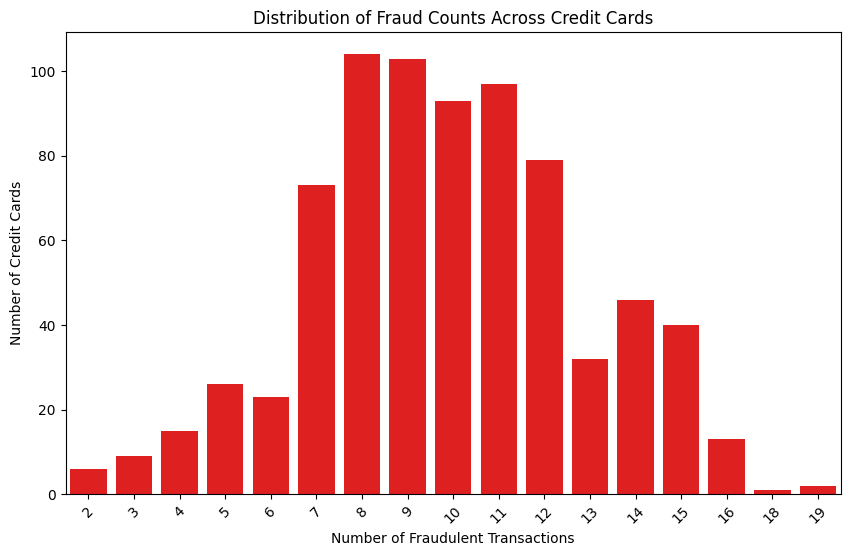

In [31]:
# Plot the distribution of fraud counts across credit cards
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_count_distribution.index, y=fraud_count_distribution.values, color='RED')

plt.title('Distribution of Fraud Counts Across Credit Cards')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Number of Credit Cards')
plt.xticks(rotation=45)
plt.show()

In [32]:
fraud_count_distribution.describe()


,count
count,17.000000
mean,44.823529
std,38.208695
min,1.000000
25%,13.000000
50%,32.000000
75%,79.000000
max,104.000000


In [33]:
top_fraud_cards = fraud_count_by_cc_sorted.head(10)
print(top_fraud_cards)


                  cc_num  fraud_count
364     3520550088202337           19
89         4593569795412           19
73         4260128500325           18
121       30074693890476           16
340     2720433095629877           16
721  4400011257587661852           16
455     3575540972310993           16
360     3518669219150142           16
631     6011366578560244           16
457     3576021480694169           16


In [34]:
cc_number = 3520550088202337
cc_transactions = df[df['cc_num'] == cc_number]

# Display the relevant columns: transaction amount and time
cc_transactions = cc_transactions[['trans_date_trans_time', 'amt']]

# Display the transactions
print(cc_transactions)

        trans_date_trans_time     amt
1054      2019-01-01 13:07:25  106.70
1086      2019-01-01 13:25:36   30.29
2310      2019-01-01 23:08:04   50.26
5182      2019-01-04 09:09:47   37.68
6858      2019-01-05 13:06:53   24.15
...                       ...     ...
1292919   2020-06-19 23:45:53  116.88
1294889   2020-06-20 20:43:57  424.41
1295376   2020-06-21 00:45:40   89.36
1295695   2020-06-21 03:43:49   85.51
1296460   2020-06-21 10:19:37   46.02

[989 rows x 2 columns]


In [35]:
# Filter for fraudulent transactions for the specific credit card number
fraud_cc_transactions = fraud_transactions[fraud_transactions['cc_num'] == cc_number]

# Display relevant columns: transaction amount and time for fraudulent transactions
fraud_cc_transactions = fraud_cc_transactions[['trans_date_trans_time', 'amt']]

# Display the fraudulent transactions
print(fraud_cc_transactions)


      trans_date_trans_time      amt
71941   2019-02-12 00:05:50   911.75
72128   2019-02-12 02:42:37    10.42
72195   2019-02-12 03:29:58   302.22
72348   2019-02-12 05:32:25   306.23
72380   2019-02-12 05:55:51     8.45
74041   2019-02-12 22:03:43   805.81
74072   2019-02-12 22:20:10  1089.43
74109   2019-02-12 22:36:29   937.62
74145   2019-02-12 22:55:34   891.97
74259   2019-02-12 23:42:38    20.54
74271   2019-02-12 23:49:17  1200.74
74292   2019-02-12 23:58:55     8.24
74890   2019-02-13 14:24:02  1078.80
74891   2019-02-13 14:24:53   881.13
74979   2019-02-13 15:54:22  1002.04
75108   2019-02-13 18:03:46   228.96
75149   2019-02-13 18:34:05    10.99
75418   2019-02-13 23:10:22  1292.21
75465   2019-02-13 23:54:01  1024.04


In [36]:
# Sum of all transactions for this credit card
cc_all_transactions = df[df['cc_num'] == cc_number]  # All transactions for the given card
total_transactions_sum = cc_all_transactions['amt'].sum()

# Sum of fraudulent transactions for this credit card
cc_fraud_transactions = fraud_transactions[fraud_transactions['cc_num'] == cc_number]  # Fraudulent transactions
total_fraud_sum = cc_fraud_transactions['amt'].sum()

# Display the results
print(f"Total amount of all transactions for card {cc_number}: ${total_transactions_sum:,.2f}")
print(f"Total amount of fraudulent transactions for card {cc_number}: ${total_fraud_sum:,.2f}")

Total amount of all transactions for card 3520550088202337: $79,783.69
Total amount of fraudulent transactions for card 3520550088202337: $12,011.59


In [37]:
# Filter fraudulent transactions for the given credit card number
fraud_cc_transactions = fraud_transactions[fraud_transactions['cc_num'] == cc_number]

# Group by category and calculate the sum of amounts for each category
fraud_by_category = fraud_cc_transactions.groupby('category')['amt'].sum().reset_index()

# Sort the result by fraud amount in descending order (optional)
fraud_by_category_sorted = fraud_by_category.sort_values(by='amt', ascending=False)

# Display the result
print(fraud_by_category_sorted)

        category      amt
6   shopping_net  8121.92
4       misc_net  1792.88
7   shopping_pos  1200.74
1    grocery_pos   608.45
2           home   228.96
3      kids_pets    20.54
0  gas_transport    18.87
8         travel    10.99
5       misc_pos     8.24


In [38]:
# Group by category and get the sum of amounts and first transaction time
fraud_by_category = fraud_cc_transactions.groupby('category').agg(
    total_fraud_amt=('amt', 'sum'),
    first_trans_time=('trans_date_trans_time', 'first')
).reset_index()

# Sort by total fraud amount in descending order (optional)
fraud_by_category_sorted = fraud_by_category.sort_values(by='total_fraud_amt', ascending=False)

# Display the result
print(fraud_by_category_sorted)

        category  total_fraud_amt    first_trans_time
6   shopping_net          8121.92 2019-02-12 22:03:43
4       misc_net          1792.88 2019-02-12 00:05:50
7   shopping_pos          1200.74 2019-02-12 23:49:17
1    grocery_pos           608.45 2019-02-12 03:29:58
2           home           228.96 2019-02-13 18:03:46
3      kids_pets            20.54 2019-02-12 23:42:38
0  gas_transport            18.87 2019-02-12 02:42:37
8         travel            10.99 2019-02-13 18:34:05
5       misc_pos             8.24 2019-02-12 23:58:55


In [13]:
# Filter by is_fraud == 1
fraud_transactions = df[df['is_fraud'] == 1]

# Group by cc_num (Credit Card Number) and calculate both count and sum of amt (Amount)
fraud_stats_by_cc = fraud_transactions.groupby('cc_num').agg(
    fraud_count=('cc_num', 'size'),  # Count of fraudulent transactions
    total_fraud_amt=('amt', 'sum')   # Sum of the amounts for fraudulent transactions
).reset_index()

# Sort by total_fraud_amt in descending order
fraud_stats_sorted_by_amt = fraud_stats_by_cc.sort_values(by='total_fraud_amt', ascending=False)

# Display the result
print(fraud_stats_sorted_by_amt)

                  cc_num  fraud_count  total_fraud_amt
364     3520550088202337           19         12011.59
614     5388659976630693           15         11061.27
559     4633065159406313           15         10994.76
752  4855488158131690372           14         10894.97
647     6011693194885790           15         10705.82
..                   ...          ...              ...
733  4503101193493052864            2           341.06
622     6011109736646996            2           280.15
491     4069975342931683            3            55.21
109        4809701904914            2            25.40
485     4005676619255478            2            20.44

[762 rows x 3 columns]


<ipython-input-14-e5603154b368>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fraud_amt', y='cc_num', data=top_fraud_by_amt, palette='viridis')


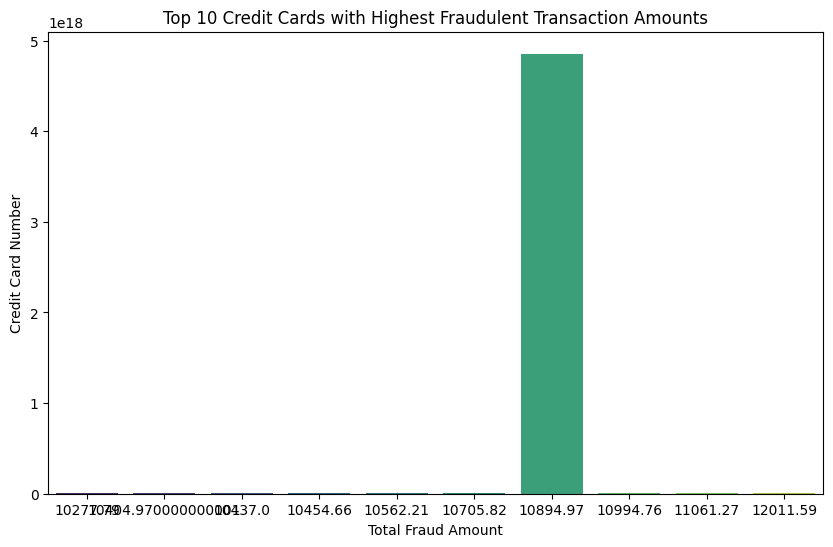

In [14]:
# Select top N rows (for example, top 10 with highest total_fraud_amt)
top_fraud_by_amt = fraud_stats_sorted_by_amt.head(10)

# Horizontal bar plot for total_fraud_amt
plt.figure(figsize=(10, 6))
sns.barplot(x='total_fraud_amt', y='cc_num', data=top_fraud_by_amt, palette='viridis')
plt.title('Top 10 Credit Cards with Highest Fraudulent Transaction Amounts')
plt.xlabel('Total Fraud Amount')
plt.ylabel('Credit Card Number')
plt.show()

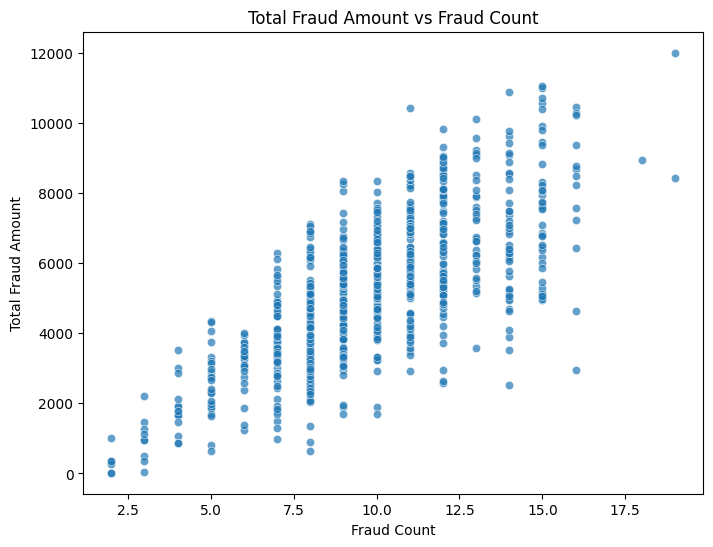

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fraud_stats_by_cc, x='fraud_count', y='total_fraud_amt', alpha=0.7)
plt.title('Total Fraud Amount vs Fraud Count')
plt.xlabel('Fraud Count')
plt.ylabel('Total Fraud Amount')
plt.show()

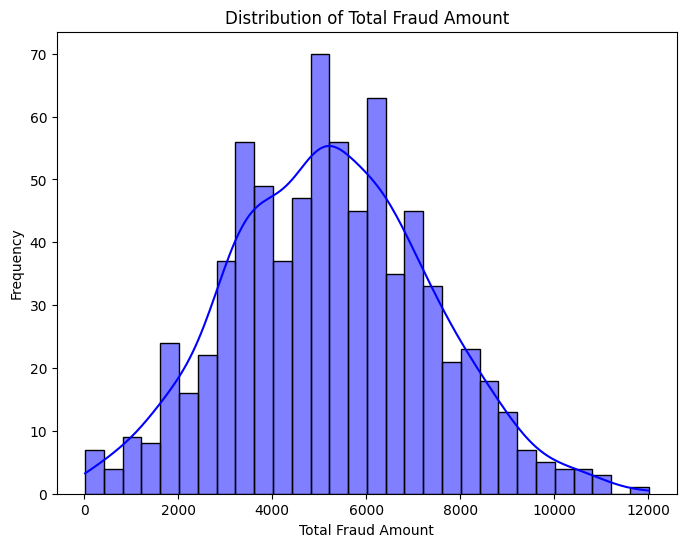

In [17]:
# Histogram for Total Fraud Amount
plt.figure(figsize=(8, 6))
sns.histplot(fraud_stats_by_cc['total_fraud_amt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Fraud Amount')
plt.xlabel('Total Fraud Amount')
plt.ylabel('Frequency')
plt.show()


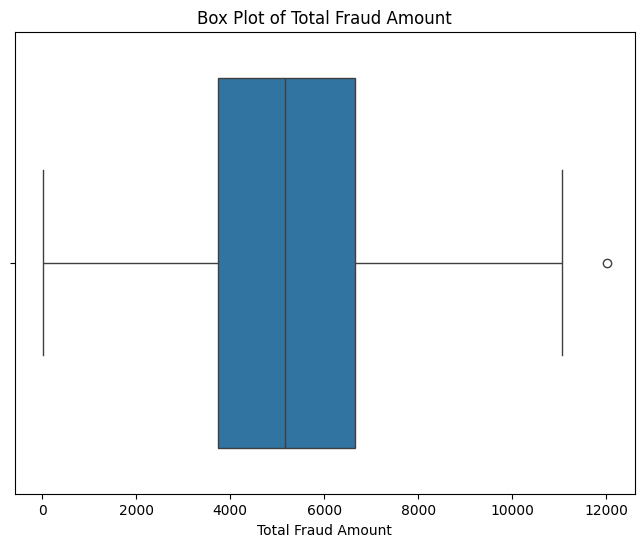

In [18]:
# Box plot for Total Fraud Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_fraud_amt', data=fraud_stats_by_cc)
plt.title('Box Plot of Total Fraud Amount')
plt.xlabel('Total Fraud Amount')
plt.show()


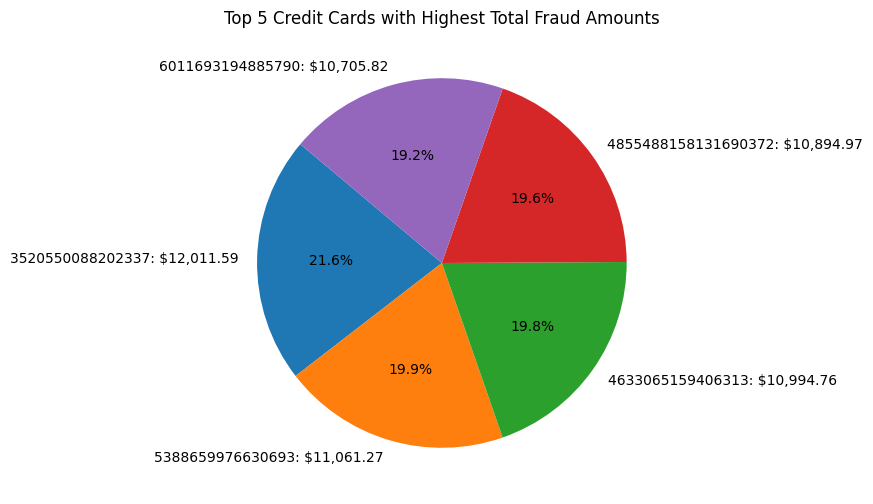

In [20]:
# Select the top 5 credit cards with the highest total fraud amounts
top_fraud_by_amt = fraud_stats_sorted_by_amt.head(5)

# Create labels with both cc_num and total_fraud_amt
labels = [f'{cc_num}: ${amt:,.2f}' for cc_num, amt in zip(top_fraud_by_amt['cc_num'], top_fraud_by_amt['total_fraud_amt'])]

# Pie chart for the top 5 cards with the highest fraud amounts
plt.figure(figsize=(8, 6))
plt.pie(top_fraud_by_amt['total_fraud_amt'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Credit Cards with Highest Total Fraud Amounts')
plt.show()

# New Section

## Gender Based analysis

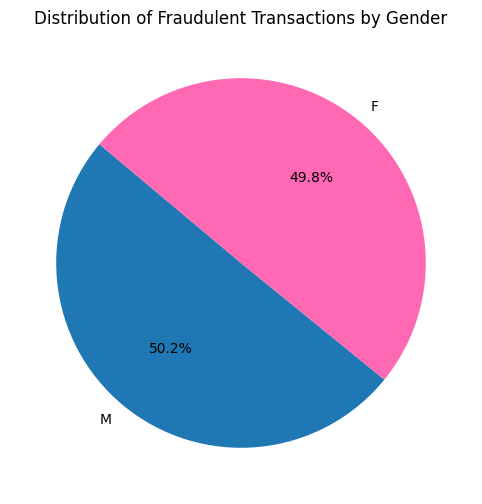

In [45]:
# Group by gender and count the number of fraudulent transactions for each gender
fraud_gender_distribution = fraud_transactions['gender'].value_counts()

# Specify colors (blue for Male, pink for Female)
colors = ['#1f77b4', '#ff69b4']  # Blue for Male, Pink for Female

# Plot the pie chart with custom colors
plt.figure(figsize=(8, 6))
plt.pie(fraud_gender_distribution,
        labels=fraud_gender_distribution.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)
plt.title('Distribution of Fraudulent Transactions by Gender')
plt.show()

In [40]:
# Group by gender and sum the fraud amounts
fraud_amount_by_gender = fraud_transactions.groupby('gender')['amt'].sum().reset_index()

# Print the result
print(fraud_amount_by_gender)

  gender         amt
0      F  1845287.34
1      M  2142801.27


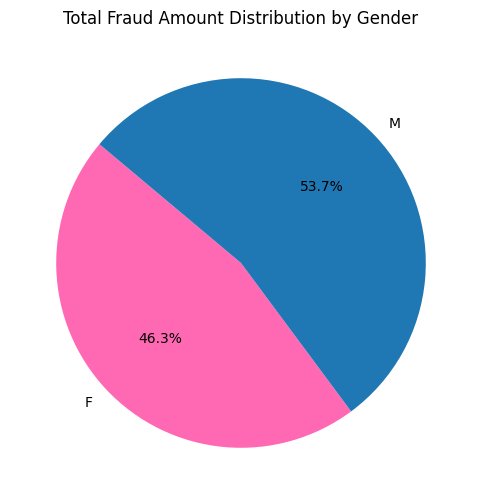

In [44]:
# Group by gender and sum the fraud amounts
fraud_amount_by_gender = fraud_transactions.groupby('gender')['amt'].sum()

# Specify colors (blue for Male, pink for Female)
colors = ['#ff69b4', '#1f77b4']  # Blue for Male, Pink for Female

# Plot the pie chart with custom colors
plt.figure(figsize=(8, 6))
plt.pie(fraud_amount_by_gender,
        labels=fraud_amount_by_gender.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)
plt.title('Total Fraud Amount Distribution by Gender')
plt.show()

In [55]:
# Filter fraudulent transactions for Female only
fraud_female = fraud_transactions[fraud_transactions['gender'] == "F"]

# Group by category and count the number of fraudulent transactions for Female
fraud_female_category = fraud_female['category'].value_counts()

# Print the result
print(fraud_female_category)


category
grocery_pos       751
shopping_net      686
shopping_pos      457
misc_net          392
gas_transport     255
kids_pets         190
home              180
misc_pos          165
personal_care     162
entertainment     146
food_dining       116
health_fitness    112
travel             66
grocery_net        57
Name: count, dtype: int64


In [56]:
# Group by job and count the number of fraudulent transactions for Female
fraud_female_job= fraud_female['job'].value_counts()

# Print the result
print(fraud_female_job)

job
Prison officer                          48
Surveyor, land/geomatics                40
Sales professional, IT                  38
Scientist, audiological                 36
Financial trader                        34
                                        ..
Chartered loss adjuster                  3
Sub                                      3
Contractor                               2
Clothing/textile technologist            2
English as a second language teacher     2
Name: count, Length: 286, dtype: int64


# New Section

## Merchant Based Analysis

merchant
fraud_Rau and Sons        49
fraud_Cormier LLC         48
fraud_Kozey-Boehm         48
fraud_Doyle Ltd           47
fraud_Vandervort-Funk     47
                          ..
fraud_Kuphal-Toy           1
fraud_Eichmann-Kilback     1
fraud_Lynch-Mohr           1
fraud_Tillman LLC          1
fraud_Hills-Olson          1
Name: count, Length: 679, dtype: int64


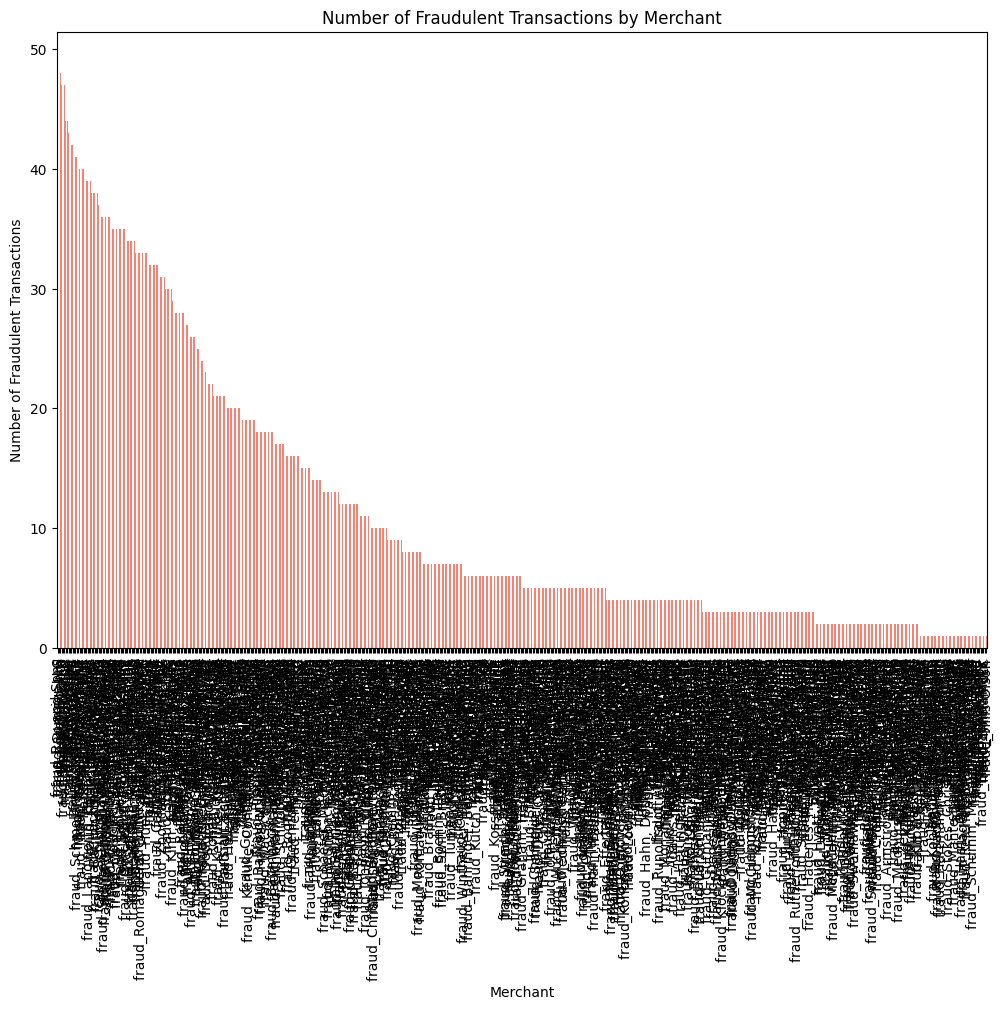

In [57]:
# Group by merchant and count the number of fraudulent transactions
fraud_by_merchant_count = fraud_transactions['merchant'].value_counts()

# Print the result
print(fraud_by_merchant_count)

# Plot a bar chart for the number of fraudulent transactions by merchant
plt.figure(figsize=(12, 8))
fraud_by_merchant_count.plot(kind='bar', color='salmon')
plt.title('Number of Fraudulent Transactions by Merchant')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)  # Rotate merchant names for better readability
plt.show()

In [58]:
# Print the result
print(fraud_by_merchant_count)

merchant
fraud_Rau and Sons        49
fraud_Cormier LLC         48
fraud_Kozey-Boehm         48
fraud_Doyle Ltd           47
fraud_Vandervort-Funk     47
                          ..
fraud_Kuphal-Toy           1
fraud_Eichmann-Kilback     1
fraud_Lynch-Mohr           1
fraud_Tillman LLC          1
fraud_Hills-Olson          1
Name: count, Length: 679, dtype: int64


In [61]:
# Group by merchant to get both the count of transactions and the sum of fraudulent amounts
fraud_by_merchant = fraud_transactions.groupby('merchant').agg(
    fraud_count=('merchant', 'size'),
    total_fraud_amt=('amt', 'sum')
)

# Sort by fraud_count in descending order and get the top 10
top_10_fraud_merchants = fraud_by_merchant.sort_values(by='fraud_count', ascending=False).head(10)

# Print the result
print(top_10_fraud_merchants)

                       fraud_count  total_fraud_amt
merchant                                           
fraud_Rau and Sons              49         15299.76
fraud_Kozey-Boehm               48         48189.98
fraud_Cormier LLC               48         44903.89
fraud_Doyle Ltd                 47         14807.91
fraud_Vandervort-Funk           47         14973.76
fraud_Kilback LLC               47         13039.28
fraud_Padberg-Welch             44         13713.45
fraud_Kuhn LLC                  44         37166.30
fraud_Terry-Huel                43         42356.37
fraud_Jast Ltd                  42         42560.34


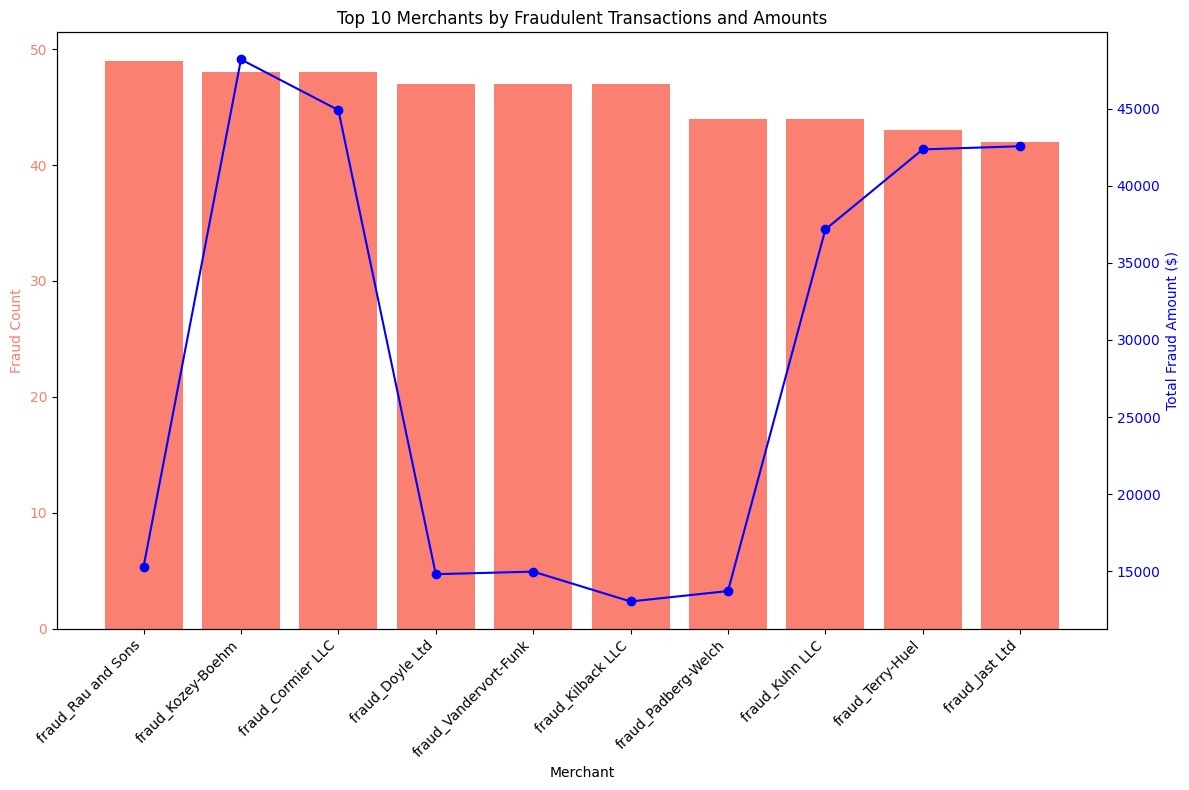

In [62]:
# Plot a bar chart showing both fraud count and total fraud amount for top 10 merchants
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the fraud count
ax1.bar(top_10_fraud_merchants.index, top_10_fraud_merchants['fraud_count'], color='salmon', label='Fraud Count')
ax1.set_xlabel('Merchant')
ax1.set_ylabel('Fraud Count', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for total fraud amount
ax2 = ax1.twinx()
ax2.plot(top_10_fraud_merchants.index, top_10_fraud_merchants['total_fraud_amt'], color='blue', marker='o', label='Total Fraud Amount')
ax2.set_ylabel('Total Fraud Amount ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legend
plt.title('Top 10 Merchants by Fraudulent Transactions and Amounts')
fig.tight_layout()
plt.show()


In [63]:

# Group by merchant and category, and count the fraudulent transactions
fraud_by_merchant_category_count = fraud_transactions.groupby(['merchant', 'category']).size().reset_index(name='fraud_count')

# Print the result
print(fraud_by_merchant_category_count)

# Optionally, you can sort by fraud count to identify the top relationships
fraud_by_merchant_category_count_sorted = fraud_by_merchant_category_count.sort_values(by='fraud_count', ascending=False)

# Print top 10 merchant-category pairs
print(fraud_by_merchant_category_count_sorted.head(10))

                             merchant        category  fraud_count
0                 fraud_Abbott-Rogahn   entertainment            3
1                fraud_Abbott-Steuber   personal_care            6
2            fraud_Abernathy and Sons     food_dining            4
3                   fraud_Abshire PLC   entertainment            9
4    fraud_Adams, Kovacek and Kuhlman     grocery_net            4
..                                ...             ...          ...
681                fraud_Zemlak Group        misc_net           17
682  fraud_Zemlak, Tillman and Cremin   personal_care            2
683              fraud_Ziemann-Waters  health_fitness            6
684      fraud_Zieme, Bode and Dooley   gas_transport            8
685                  fraud_Zulauf LLC   personal_care            2

[686 rows x 3 columns]
                  merchant      category  fraud_count
492     fraud_Rau and Sons   grocery_pos           49
339      fraud_Kozey-Boehm  shopping_net           48
639  fraud

In [64]:
# Group by merchant and category, and sum the fraudulent amounts
fraud_by_merchant_category_amt = fraud_transactions.groupby(['merchant', 'category'])['amt'].sum().reset_index(name='total_fraud_amt')

# Print the result
print(fraud_by_merchant_category_amt)

# Sort by total fraudulent amount
fraud_by_merchant_category_amt_sorted = fraud_by_merchant_category_amt.sort_values(by='total_fraud_amt', ascending=False)

# Print top 10 merchant-category pairs with highest fraud amount
print(fraud_by_merchant_category_amt_sorted.head(10))


                             merchant        category  total_fraud_amt
0                 fraud_Abbott-Rogahn   entertainment          1517.73
1                fraud_Abbott-Steuber   personal_care           151.94
2            fraud_Abernathy and Sons     food_dining           481.68
3                   fraud_Abshire PLC   entertainment          4602.36
4    fraud_Adams, Kovacek and Kuhlman     grocery_net            59.52
..                                ...             ...              ...
681                fraud_Zemlak Group        misc_net         13334.15
682  fraud_Zemlak, Tillman and Cremin   personal_care            35.54
683              fraud_Ziemann-Waters  health_fitness           112.29
684      fraud_Zieme, Bode and Dooley   gas_transport            95.24
685                  fraud_Zulauf LLC   personal_care            38.83

[686 rows x 3 columns]
                                merchant      category  total_fraud_amt
339                    fraud_Kozey-Boehm  shopping_n

In [68]:
# Group by category and calculate:
# 1. Count of unique fraud merchants (nunique)
# 2. Sum of fraudulent amounts (sum)
fraud_merchants_and_amt_by_category = fraud_transactions.groupby('category').agg(
    fraud_merchants_count=('merchant', 'nunique'),
    total_fraud_amt=('amt', 'sum')
).reset_index()

# Sort by fraud_merchants_count in descending order to see the most affected categories
fraud_merchants_and_amt_by_category_sorted = fraud_merchants_and_amt_by_category.sort_values(by='fraud_merchants_count', ascending=False)

# Print the result
print(fraud_merchants_and_amt_by_category_sorted)

          category  fraud_merchants_count  total_fraud_amt
2    gas_transport                     50          7594.11
4      grocery_pos                     50        543797.90
7        kids_pets                     50          4331.08
8         misc_net                     50        729266.76
9         misc_pos                     50         54571.02
11    shopping_net                     50       1711723.71
12    shopping_pos                     50        739245.09
0    entertainment                     49        117323.79
1      food_dining                     49         18131.62
5   health_fitness                     49          2693.04
6             home                     49         50971.66
10   personal_care                     49          5757.52
3      grocery_net                     47          1629.82
13          travel                     44          1051.49


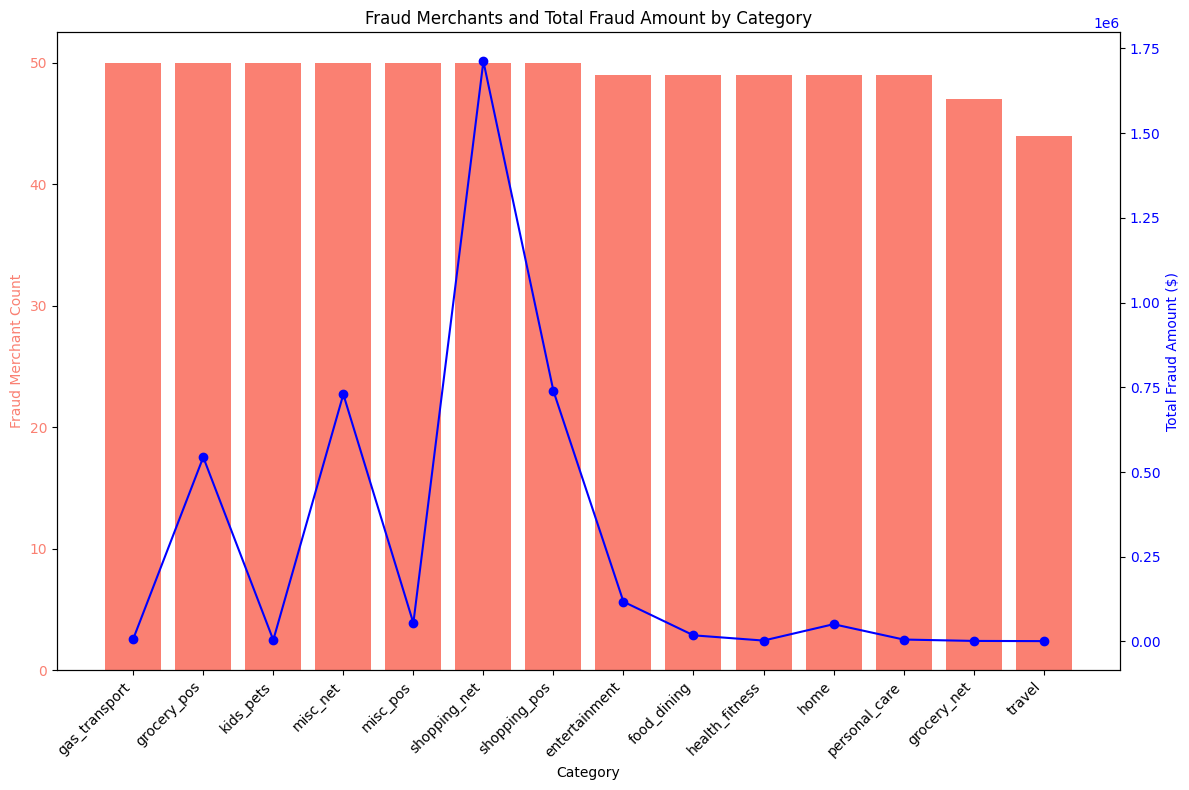

In [69]:
# Plot a bar chart to show fraud merchants count and total fraud amount by category
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the fraud merchant count on the primary axis
ax1.bar(fraud_merchants_and_amt_by_category_sorted['category'], fraud_merchants_and_amt_by_category_sorted['fraud_merchants_count'], color='salmon', label='Fraud Merchant Count')
ax1.set_xlabel('Category')
ax1.set_ylabel('Fraud Merchant Count', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
plt.xticks(rotation=45, ha='right')

# Create a secondary y-axis for total fraud amount
ax2 = ax1.twinx()
ax2.plot(fraud_merchants_and_amt_by_category_sorted['category'], fraud_merchants_and_amt_by_category_sorted['total_fraud_amt'], color='blue', marker='o', label='Total Fraud Amount')
ax2.set_ylabel('Total Fraud Amount ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title('Fraud Merchants and Total Fraud Amount by Category')
fig.tight_layout()
plt.show()


# New Section

## City Pop -(CITY POPULATION)
Population of the cardholder's city. This might help in identifying whether the transaction occurs in a small town or a metropolitan area, which could influence fraud likelihood.


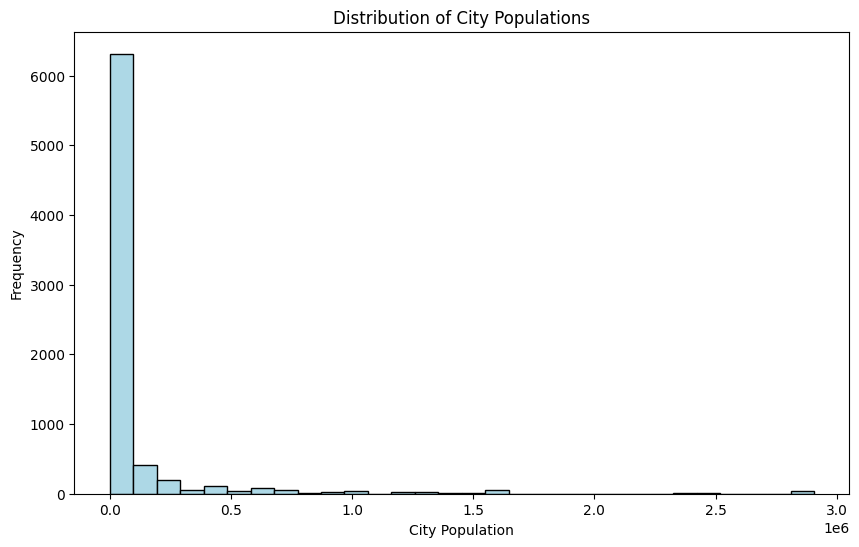

In [85]:
# Plot histogram to show the distribution of city populations
plt.figure(figsize=(10, 6))
plt.hist(fraud_transactions['city_pop'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of City Populations')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.show()

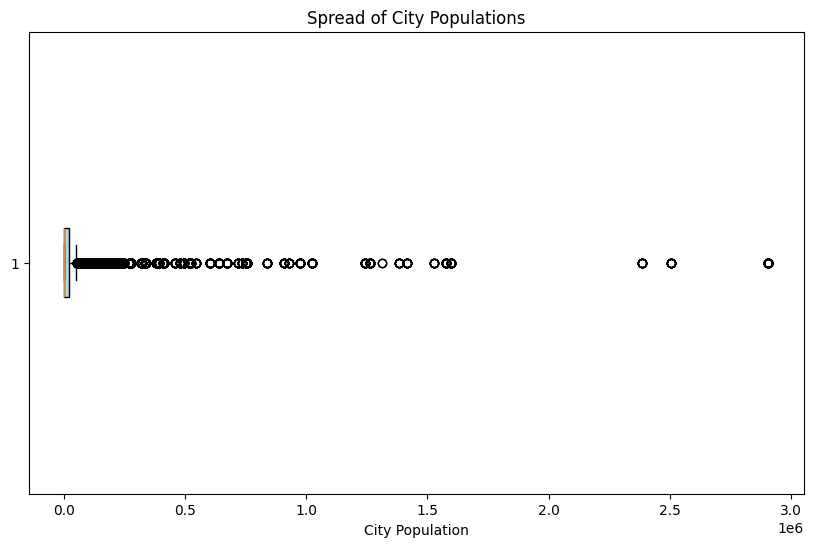

In [86]:
# Plot box plot to show the spread of city populations
plt.figure(figsize=(10, 6))
plt.boxplot(fraud_transactions['city_pop'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Spread of City Populations')
plt.xlabel('City Population')
plt.show()


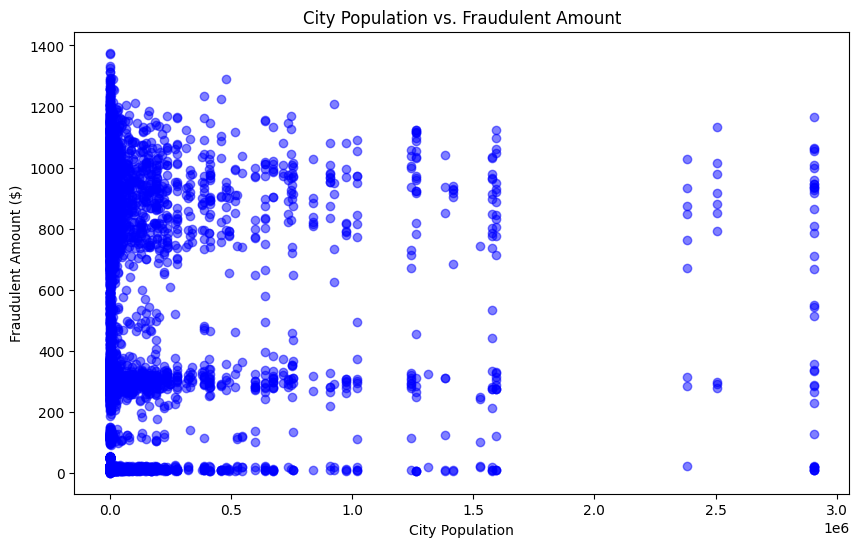

In [87]:
# Scatter plot to explore the relationship between city population and fraudulent amount
plt.figure(figsize=(10, 6))
plt.scatter(fraud_transactions['city_pop'], fraud_transactions['amt'], alpha=0.5, color='blue')
plt.title('City Population vs. Fraudulent Amount')
plt.xlabel('City Population')
plt.ylabel('Fraudulent Amount ($)')
plt.show()


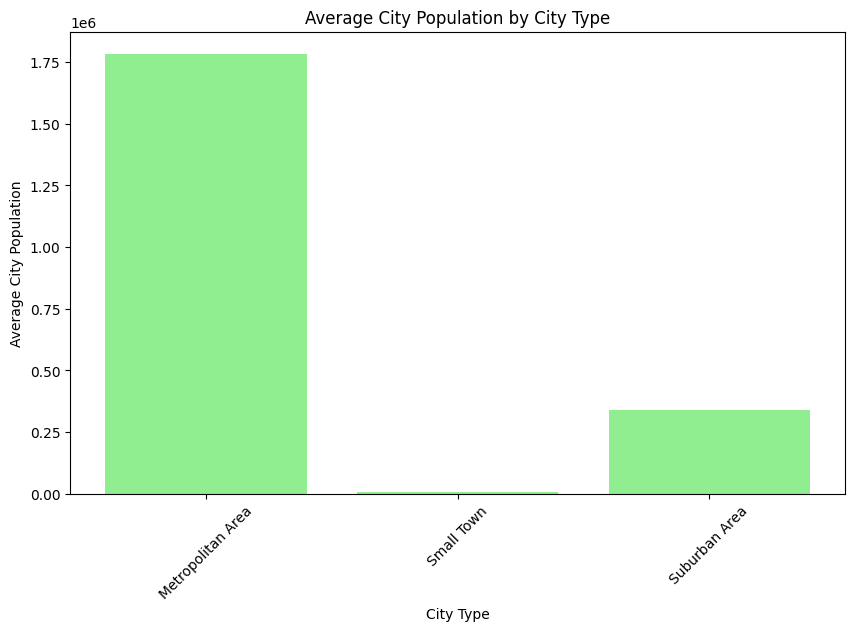

In [88]:
# Group by 'city_type' and calculate the average city population
avg_city_pop_by_type = fraud_transactions.groupby('city_type')['city_pop'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_city_pop_by_type['city_type'], avg_city_pop_by_type['city_pop'], color='lightgreen')
plt.title('Average City Population by City Type')
plt.xlabel('City Type')
plt.ylabel('Average City Population')
plt.xticks(rotation=45)
plt.show()


In [91]:
from google.colab import files

# Filter the DataFrame for fraudulent transactions (is_fraud == 1)
fraud_transactions = df[df['is_fraud'] == 1]

# Save the filtered DataFrame to a CSV file
fraud_transactions.to_csv('fraud_transactions.csv', index=False)

# Download the CSV file
files.download('fraud_transactions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

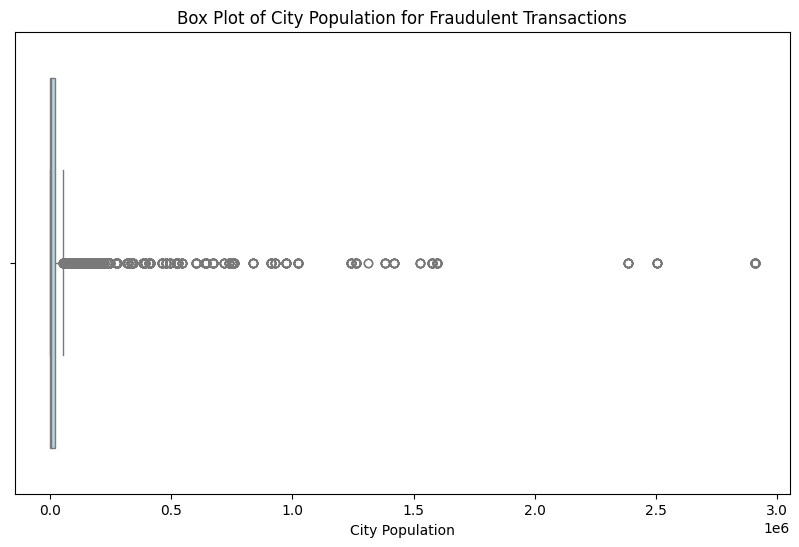

In [71]:
# Create a box plot for the 'city_pop' (city population) of fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x=fraud_transactions['city_pop'], color='lightblue')

# Add labels and title
plt.title('Box Plot of City Population for Fraudulent Transactions')
plt.xlabel('City Population')

# Show the plot
plt.show()

<ipython-input-72-633892d44a9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='city_pop', data=fraud_transactions, palette='pastel')


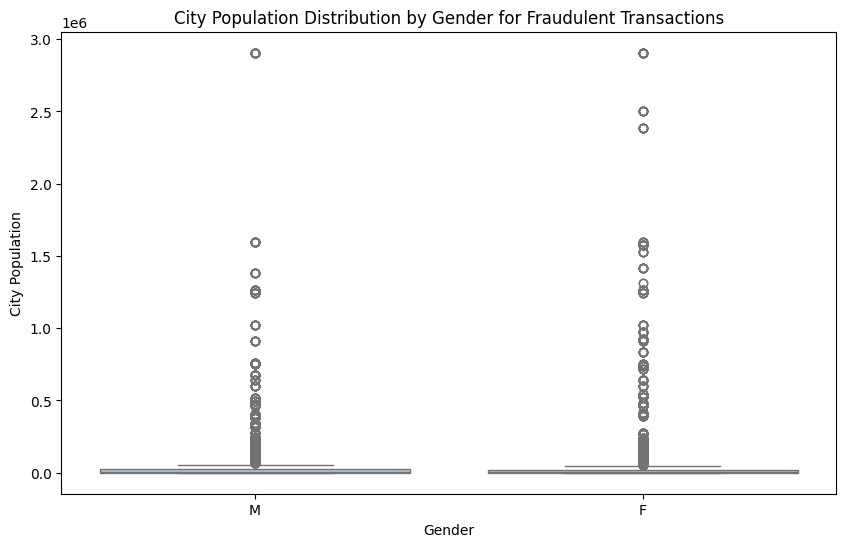

In [72]:
# Box plot of city population by gender for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='city_pop', data=fraud_transactions, palette='pastel')

# Add labels and title
plt.title('City Population Distribution by Gender for Fraudulent Transactions')
plt.xlabel('Gender')
plt.ylabel('City Population')

# Show the plot
plt.show()

In [73]:
# Get the maximum value of city_pop in fraudulent transactions
max_city_pop = fraud_transactions['city_pop'].max()

# Print the maximum city population
print(f"The maximum city population for fraudulent transactions is: {max_city_pop}")

The maximum city population for fraudulent transactions is: 2906700


In [76]:
# Function to categorize cities based on population
def categorize_city_population(population):
    if population < 100000:
        return 'Small Town'
    elif population < 1000000:
        return 'Suburban Area'
    else:
        return 'Metropolitan Area'

# Apply the categorization function to the 'city_pop' column and create a new column 'city_type'
fraud_transactions.loc[:, 'city_type'] = fraud_transactions['city_pop'].apply(categorize_city_population)

# Check the result by showing the first few rows of the fraud transactions with city type
print(fraud_transactions[['city_pop', 'city_type']].head())

      city_pop          city_type
2449       885         Small Town
2472   1595797  Metropolitan Area
2523   1595797  Metropolitan Area
2546       885         Small Town
2553   1595797  Metropolitan Area


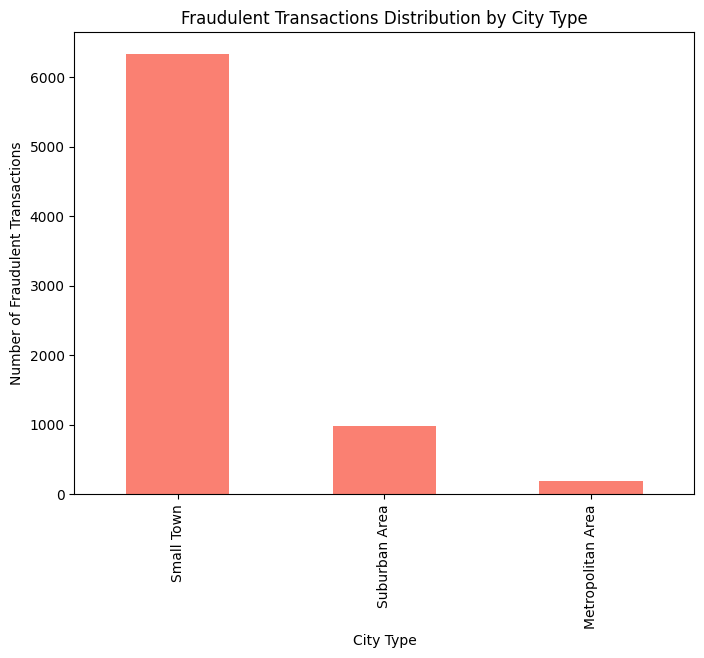

In [77]:
# Count the number of fraudulent transactions by city type
fraud_by_city_type = fraud_transactions['city_type'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
fraud_by_city_type.plot(kind='bar', color='salmon')

# Add labels and title
plt.title('Fraudulent Transactions Distribution by City Type')
plt.xlabel('City Type')
plt.ylabel('Number of Fraudulent Transactions')

# Show the plot
plt.show()

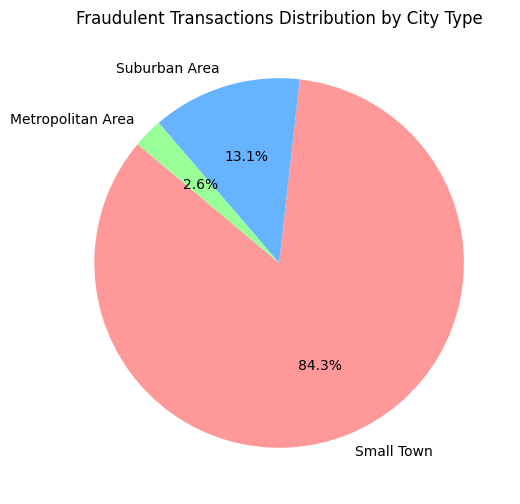

In [78]:
# Plot the distribution as a pie chart
plt.figure(figsize=(8, 6))
fraud_by_city_type.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF', '#99FF99'])

# Add title
plt.title('Fraudulent Transactions Distribution by City Type')

# Show the plot
plt.ylabel('')  # Hide the y-axis label
plt.show()


           city_type         amt
0  Metropolitan Area   112262.95
1         Small Town  3360370.51
2      Suburban Area   515455.15


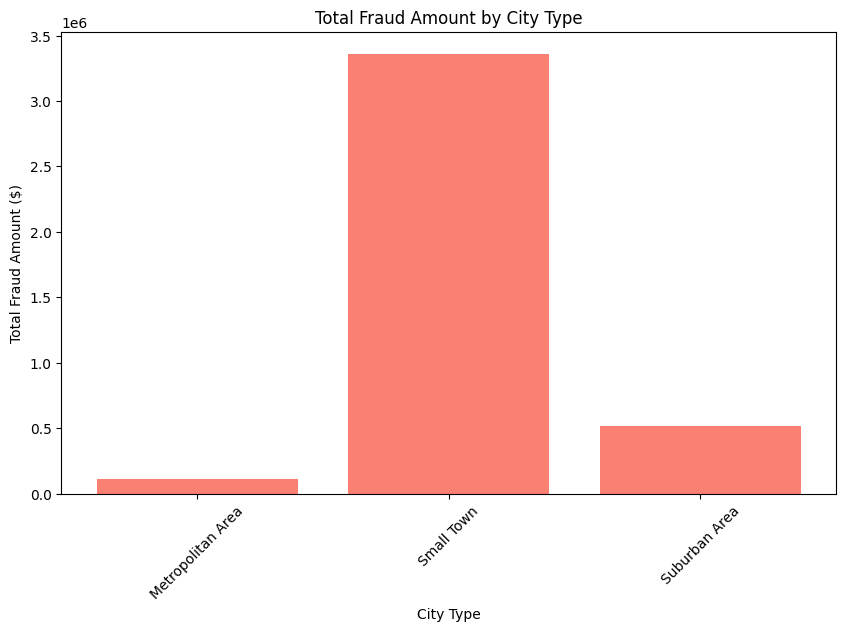

In [79]:
# Group by city type and sum the fraudulent amounts
fraud_by_city_type_amt = fraud_transactions.groupby('city_type')['amt'].sum().reset_index()

# Print the result
print(fraud_by_city_type_amt)

# Plot the result as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_city_type_amt['city_type'], fraud_by_city_type_amt['amt'], color='salmon')
plt.title('Total Fraud Amount by City Type')
plt.xlabel('City Type')
plt.ylabel('Total Fraud Amount ($)')
plt.xticks(rotation=45)
plt.show()


           city_type gender         amt
0  Metropolitan Area      F    60115.05
1  Metropolitan Area      M    52147.90
2         Small Town      F  1536835.79
3         Small Town      M  1823534.72
4      Suburban Area      F   248336.50
5      Suburban Area      M   267118.65


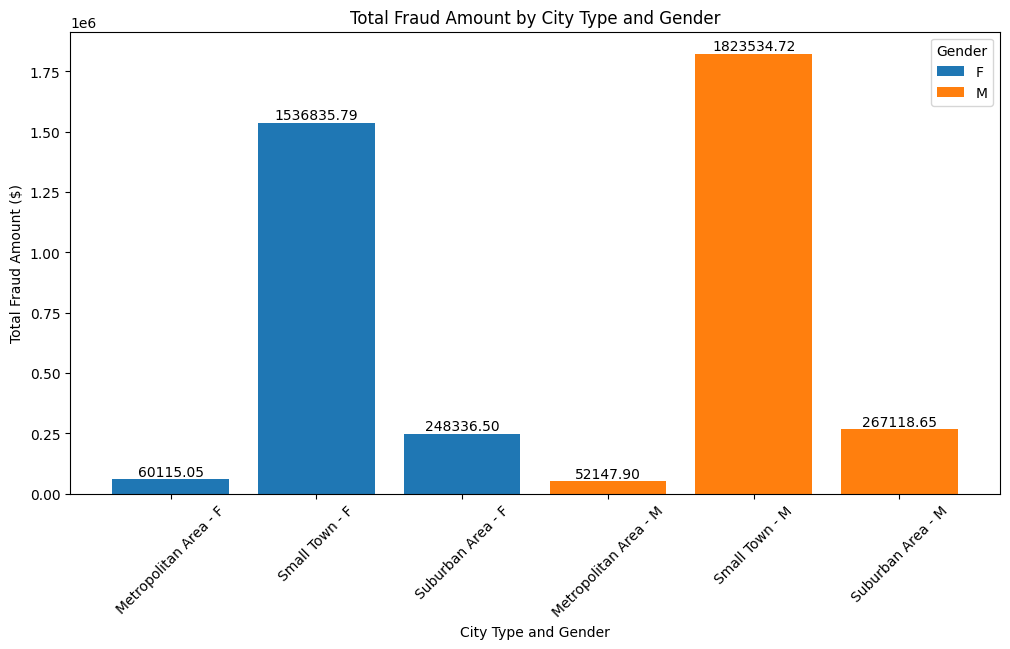

In [81]:
# Group by both 'city_type' and 'gender', and sum the fraudulent amounts
fraud_by_city_gender_amt = fraud_transactions.groupby(['city_type', 'gender'])['amt'].sum().reset_index()

# Print the result
print(fraud_by_city_gender_amt)

# Plot the result as a bar chart
plt.figure(figsize=(12, 6))

# Create a bar plot, with city type on the x-axis, and fraud amounts on the y-axis, grouped by gender
bars = []
for gender in fraud_by_city_gender_amt['gender'].unique():
    subset = fraud_by_city_gender_amt[fraud_by_city_gender_amt['gender'] == gender]
    bar = plt.bar(subset['city_type'] + ' - ' + gender, subset['amt'], label=gender)

    # Add values on top of the bars
    for rect in bar:
        height = rect.get_height()  # Get the height of the bar (fraud amount)
        plt.text(rect.get_x() + rect.get_width() / 2, height + 500,  # Position the text above the bar
                 f'{height:.2f}',  # Display value with 2 decimal places
                 ha='center', va='bottom', color='black', fontsize=10)  # Text styling

# Add title and labels
plt.title('Total Fraud Amount by City Type and Gender')
plt.xlabel('City Type and Gender')
plt.ylabel('Total Fraud Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show the plot
plt.show()

            city_type gender       category        amt
0   Metropolitan Area      F  entertainment    2957.98
1   Metropolitan Area      F    food_dining     342.70
2   Metropolitan Area      F  gas_transport      75.31
3   Metropolitan Area      F    grocery_net      10.54
4   Metropolitan Area      F    grocery_pos    6647.68
..                ...    ...            ...        ...
75      Suburban Area      M       misc_pos      84.23
76      Suburban Area      M  personal_care      37.12
77      Suburban Area      M   shopping_net  116784.11
78      Suburban Area      M   shopping_pos   49443.68
79      Suburban Area      M         travel      44.73

[80 rows x 4 columns]


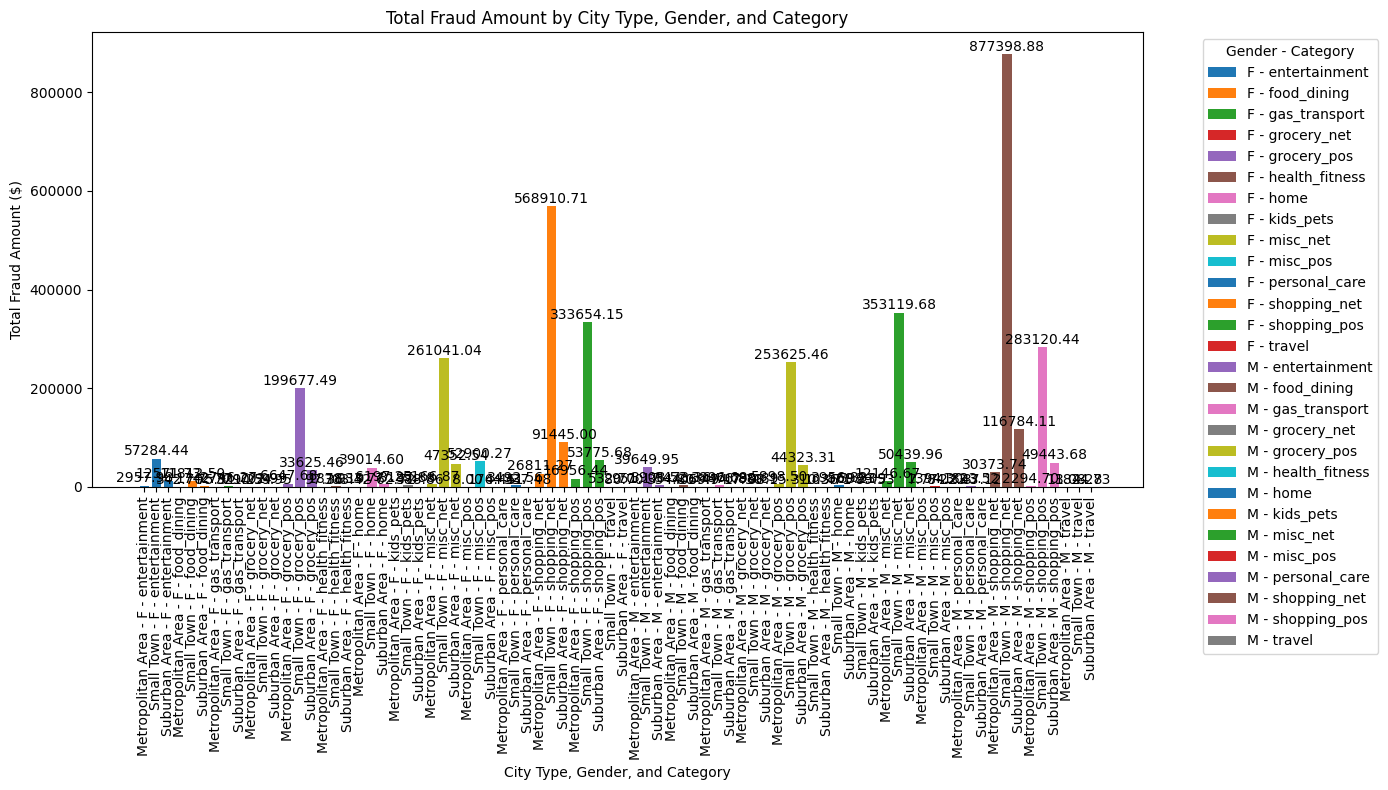

In [83]:
# Group by 'city_type', 'gender', and 'category', and sum the fraudulent amounts
fraud_by_city_gender_category_amt = fraud_transactions.groupby(['city_type', 'gender', 'category'])['amt'].sum().reset_index()

# Print the result
print(fraud_by_city_gender_category_amt)

# Plot the result as a bar chart
plt.figure(figsize=(14, 8))

# Create a bar plot, with city type and gender on the x-axis, and fraud amounts on the y-axis, grouped by category
bars = []
for gender in fraud_by_city_gender_category_amt['gender'].unique():
    for category in fraud_by_city_gender_category_amt['category'].unique():
        # Subset data for the specific gender and category
        subset = fraud_by_city_gender_category_amt[(fraud_by_city_gender_category_amt['gender'] == gender) & (fraud_by_city_gender_category_amt['category'] == category)]

        if not subset.empty:
            # Create a bar for each combination of city type, gender, and category
            bar = plt.bar(subset['city_type'] + ' - ' + gender + ' - ' + category, subset['amt'], label=f'{gender} - {category}')

            # Add values on top of the bars
            for rect in bar:
                height = rect.get_height()  # Get the height of the bar (fraud amount)
                plt.text(rect.get_x() + rect.get_width() / 2, height + 500,  # Position the text above the bar
                         f'{height:.2f}',  # Display value with 2 decimal places
                         ha='center', va='bottom', color='black', fontsize=10)  # Text styling

# Add title and labels
plt.title('Total Fraud Amount by City Type, Gender, and Category')
plt.xlabel('City Type, Gender, and Category')
plt.ylabel('Total Fraud Amount ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels to fit better
plt.legend(title='Gender - Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

            city_type gender      category        amt
11  Metropolitan Area      F  shopping_net   26811.27
12  Metropolitan Area      F  shopping_pos   16956.44
4   Metropolitan Area      F   grocery_pos    6647.68
21  Metropolitan Area      M  shopping_net   30373.74
18  Metropolitan Area      M      misc_net   12146.67
17  Metropolitan Area      M   grocery_pos    5898.50
35         Small Town      F  shopping_net  568910.71
36         Small Town      F  shopping_pos  333654.15
32         Small Town      F      misc_net  261041.04
49         Small Town      M  shopping_net  877398.88
46         Small Town      M      misc_net  353119.68
50         Small Town      M  shopping_pos  283120.44
63      Suburban Area      F  shopping_net   91445.00
64      Suburban Area      F  shopping_pos   53775.68
60      Suburban Area      F      misc_net   47352.54
77      Suburban Area      M  shopping_net  116784.11
74      Suburban Area      M      misc_net   50439.96
78      Suburban Area      M

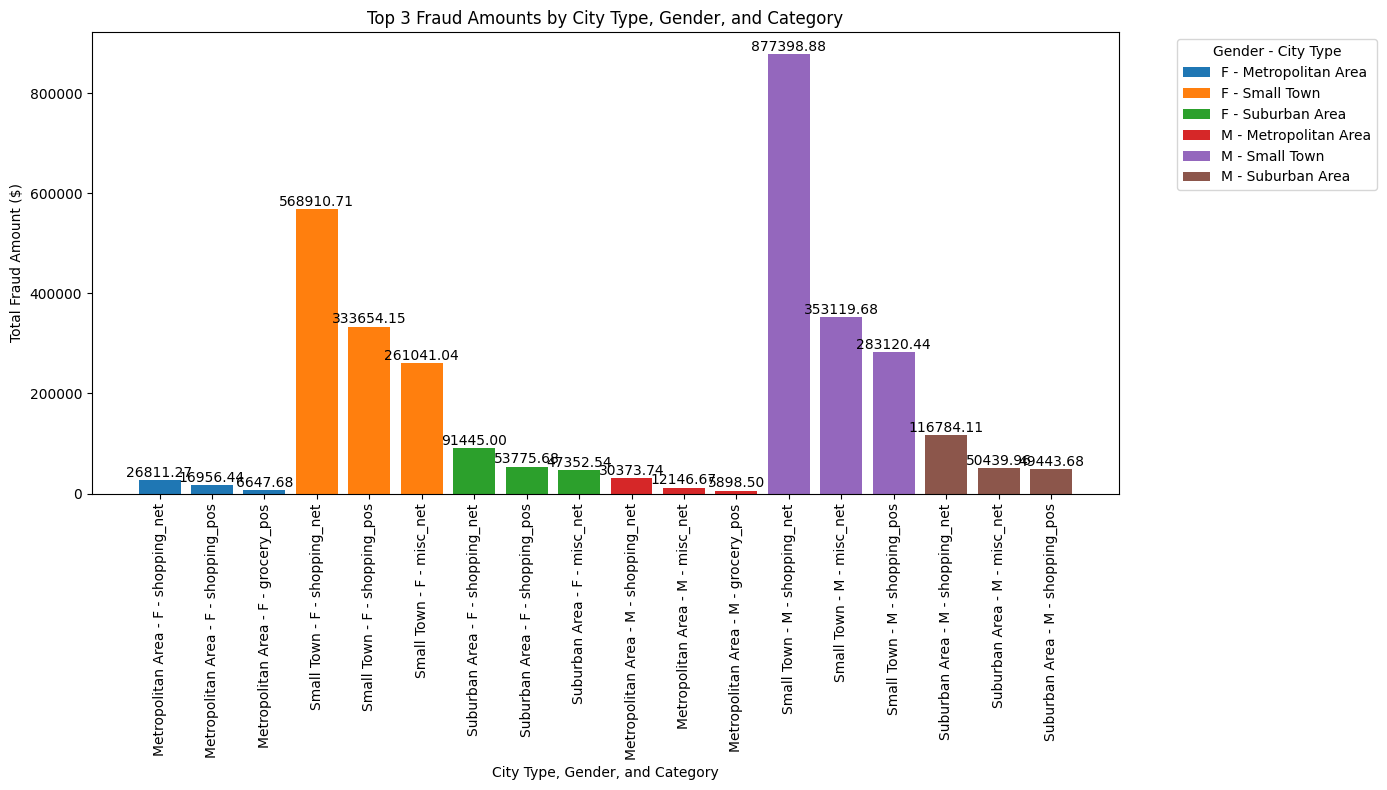

In [84]:
# Group by 'city_type', 'gender', and 'category', and sum the fraudulent amounts
fraud_by_city_gender_category_amt = fraud_transactions.groupby(['city_type', 'gender', 'category'])['amt'].sum().reset_index()

# Sort values within each group (city_type, gender) and select the top 3 categories
top_fraud_by_category = fraud_by_city_gender_category_amt.sort_values(by=['city_type', 'gender', 'amt'], ascending=[True, True, False])

# For each city_type and gender, select the top 3 categories
top_3_fraud_categories = top_fraud_by_category.groupby(['city_type', 'gender']).head(3)

# Print the result to verify
print(top_3_fraud_categories)

# Plot the result as a bar chart
plt.figure(figsize=(14, 8))

# Create a bar plot, with city type and gender on the x-axis, and fraud amounts on the y-axis, grouped by category
bars = []
for gender in top_3_fraud_categories['gender'].unique():
    for city_type in top_3_fraud_categories['city_type'].unique():
        # Subset data for the specific city_type and gender
        subset = top_3_fraud_categories[(top_3_fraud_categories['gender'] == gender) & (top_3_fraud_categories['city_type'] == city_type)]

        # Create a bar for each combination of city type, gender, and category
        bar = plt.bar(subset['city_type'] + ' - ' + gender + ' - ' + subset['category'], subset['amt'], label=f'{gender} - {city_type}')

        # Add values on top of the bars
        for rect in bar:
            height = rect.get_height()  # Get the height of the bar (fraud amount)
            plt.text(rect.get_x() + rect.get_width() / 2, height + 500,  # Position the text above the bar
                     f'{height:.2f}',  # Display value with 2 decimal places
                     ha='center', va='bottom', color='black', fontsize=10)  # Text styling

# Add title and labels
plt.title('Top 3 Fraud Amounts by City Type, Gender, and Category')
plt.xlabel('City Type, Gender, and Category')
plt.ylabel('Total Fraud Amount ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels to fit better
plt.legend(title='Gender - City Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

In [49]:
# prompt: convert lat , log , merch_lat and merch_log to find distance bn them

import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two points on the earth (specified in decimal degrees)
    using the Haversine formula.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius of earth in kilometers
    return c * r

df['distance'] = df.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

print(df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head())

       lat      long  merch_lat  merch_long    distance
0  36.0788  -81.1781  36.011293  -82.048315   78.597568
1  48.8878 -118.2105  49.159047 -118.186462   30.212176
2  42.1808 -112.2620  43.150704 -112.154481  108.206083
3  46.2306 -112.1138  47.034331 -112.561071   95.673231
4  38.4207  -79.4629  38.674999  -78.632459   77.556744


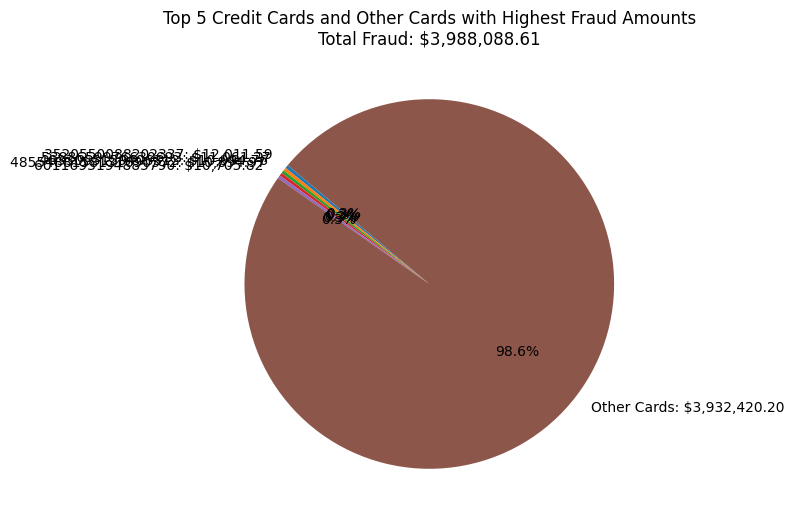

In [22]:
# Calculate the total fraud amount across all cards
total_fraud = fraud_stats_by_cc['total_fraud_amt'].sum()

# Select the top 5 credit cards with the highest total fraud amounts
top_fraud_by_amt = fraud_stats_sorted_by_amt.head(5)

# Calculate the remaining fraud amount for cards not in the top 5
other_fraud_amt = total_fraud - top_fraud_by_amt['total_fraud_amt'].sum()

# Create a DataFrame for the "Other Cards" fraud amount
other_cards_df = pd.DataFrame({
    'cc_num': ['Other Cards'],
    'fraud_count': ['N/A'],
    'total_fraud_amt': [other_fraud_amt]
})

# Concatenate the "Other Cards" row to the top fraud DataFrame
top_fraud_by_amt = pd.concat([top_fraud_by_amt, other_cards_df], ignore_index=True)

# Create labels for the pie chart: credit card number and corresponding fraud amount
labels = [f'{cc_num}: ${amt:,.2f}' for cc_num, amt in zip(top_fraud_by_amt['cc_num'], top_fraud_by_amt['total_fraud_amt'])]

# Pie chart for the top 5 credit cards with the highest fraud amounts
plt.figure(figsize=(8, 6))
plt.pie(top_fraud_by_amt['total_fraud_amt'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Top 5 Credit Cards and Other Cards with Highest Fraud Amounts\nTotal Fraud: ${total_fraud:,.2f}')
plt.show()

In [24]:
# Filter the data to find fraud amounts between 3500 and 7000
fraud_in_range = fraud_stats_by_cc[(fraud_stats_by_cc['total_fraud_amt'] >= 3500) & (fraud_stats_by_cc['total_fraud_amt'] <= 7000)]

# Count the number of rows (fraudulent transactions) in this range
count_fraud_in_range = fraud_in_range.shape[0]

# Sum the total fraud amount for transactions in this range
total_fraud_in_range = fraud_in_range['total_fraud_amt'].sum()

# Display the results
print(f"Number of fraud cases with total fraud amount between $3500 and $7000: {count_fraud_in_range}")
print(f"Total fraud amount for these cases: ${total_fraud_in_range:,.2f}")


Number of fraud cases with total fraud amount between $3500 and $7000: 441
Total fraud amount for these cases: $2,313,434.38


In [25]:
fraud_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             7506 non-null   int64         
 1   trans_date_trans_time  7506 non-null   datetime64[ns]
 2   cc_num                 7506 non-null   int64         
 3   merchant               7506 non-null   object        
 4   category               7506 non-null   object        
 5   amt                    7506 non-null   float64       
 6   first                  7506 non-null   object        
 7   last                   7506 non-null   object        
 8   gender                 7506 non-null   object        
 9   street                 7506 non-null   object        
 10  city                   7506 non-null   object        
 11  state                  7506 non-null   object        
 12  zip                    7506 non-null   int64         
 13  la

In [26]:
fraud_transactions.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1970-01-01 00:00:01.325466397,36.430124,-81.179483,1,2019-01-02
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1970-01-01 00:00:01.325468849,29.819364,-99.142791,1,2019-01-02
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1970-01-01 00:00:01.325473523,29.273085,-98.836360,1,2019-01-02
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1970-01-01 00:00:01.325475483,35.909292,-82.091010,1,2019-01-02
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1970-01-01 00:00:01.325476547,29.786426,-98.683410,1,2019-01-02


ValueError: Invalid RGBA argument: 'sky blue'

Error in callback <function _draw_all_if_interactive at 0x7d939275e4d0> (for post_execute):


ValueError: Invalid RGBA argument: 'sky blue'

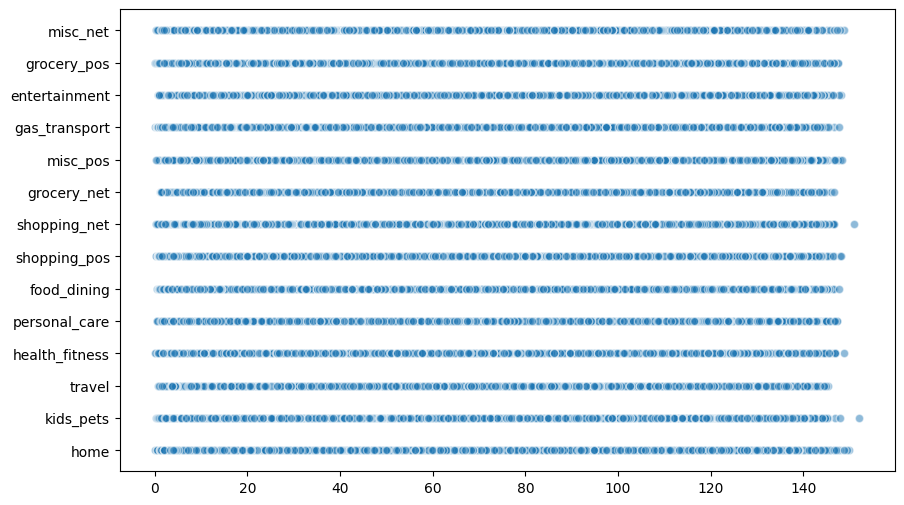

In [55]:
# prompt: scatter plot isfraud and not with respect distance and cTEGORY use 2 colours

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='category', hue='is_fraud', data=df, palette=['sky blue', 'red'], alpha=0.5)
plt.title('Scatter Plot of Distance vs. Category, Colored by Fraud')
plt.xlabel('Distance (km)')
plt.ylabel('Category')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

In [26]:
# prompt: count of is_fraud

print(df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


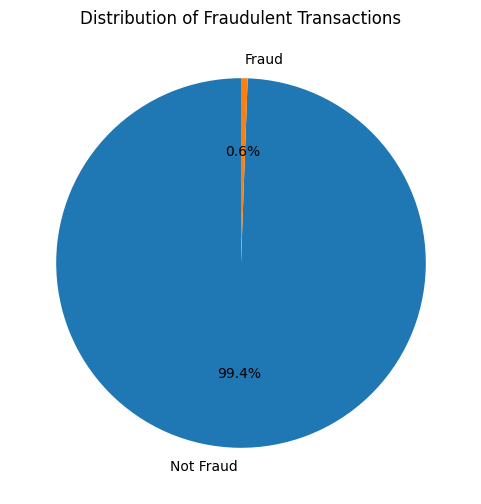

In [27]:
# prompt: pie chart of is_fraud with data lable

is_fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(is_fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

The output of the `value_counts()` function for the `is_fraud` column shows a highly imbalanced dataset, where:

- 1,289,169 transactions are legitimate (class 0)
- 7,506 transactions are fraudulent (class 1)

This indicates that only a very small percentage of the transactions are fraudulent. This class imbalance will likely pose a challenge for model training, as most machine learning algorithms are biased towards the majority class (legitimate transactions). As a result, the model may struggle to correctly identify fraudulent transactions, leading to poor detection and a high number of false negatives.


In [28]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1970-01-01 00:00:01.325376018,36.011293,-82.048315,0,2019-01-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1970-01-01 00:00:01.325376044,49.159047,-118.186462,0,2019-01-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1970-01-01 00:00:01.325376051,43.150704,-112.154481,0,2019-01-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1970-01-01 00:00:01.325376076,47.034331,-112.561071,0,2019-01-01
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1970-01-01 00:00:01.325376186,38.674999,-78.632459,0,2019-01-01


In [29]:
df_fraud = df[df['is_fraud'] == 1]

In [31]:
df_fraud.head(6)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1970-01-01 00:00:01.325466397,36.430124,-81.179483,1,2019-01-02
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1970-01-01 00:00:01.325468849,29.819364,-99.142791,1,2019-01-02
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1970-01-01 00:00:01.325473523,29.273085,-98.836360,1,2019-01-02
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1970-01-01 00:00:01.325475483,35.909292,-82.091010,1,2019-01-02
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1970-01-01 00:00:01.325476547,29.786426,-98.683410,1,2019-01-02
2937,2937,2019-01-02 13:38:08,4613314721966,fraud_Medhurst PLC,shopping_net,844.80,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,248c2746e78f2ec713df51254ff1b302,1970-01-01 00:00:01.325511488,35.987802,-81.254332,1,2019-01-02


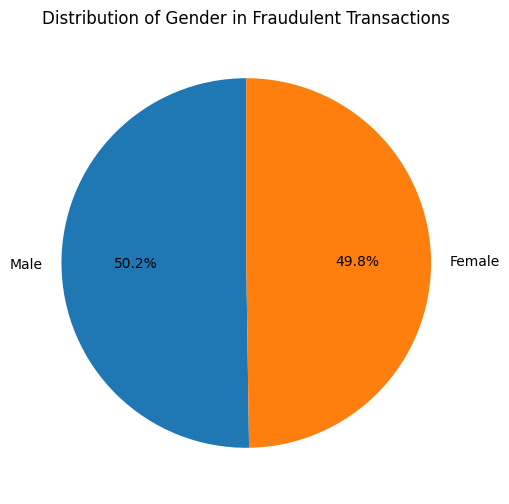

In [35]:
# prompt: data lable values male and female count pie chart of gender from df_fraud

gender_counts = df_fraud['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender in Fraudulent Transactions')
plt.show()

In [38]:
category_counts = df_fraud['category'].value_counts()
print("Categories and their counts in fraudulent transactions:")
category_counts

Categories and their counts in fraudulent transactions:


,count
category,
grocery_pos,1743
shopping_net,1713
misc_net,915
shopping_pos,843
gas_transport,618
misc_pos,250
kids_pets,239
entertainment,233
personal_care,220


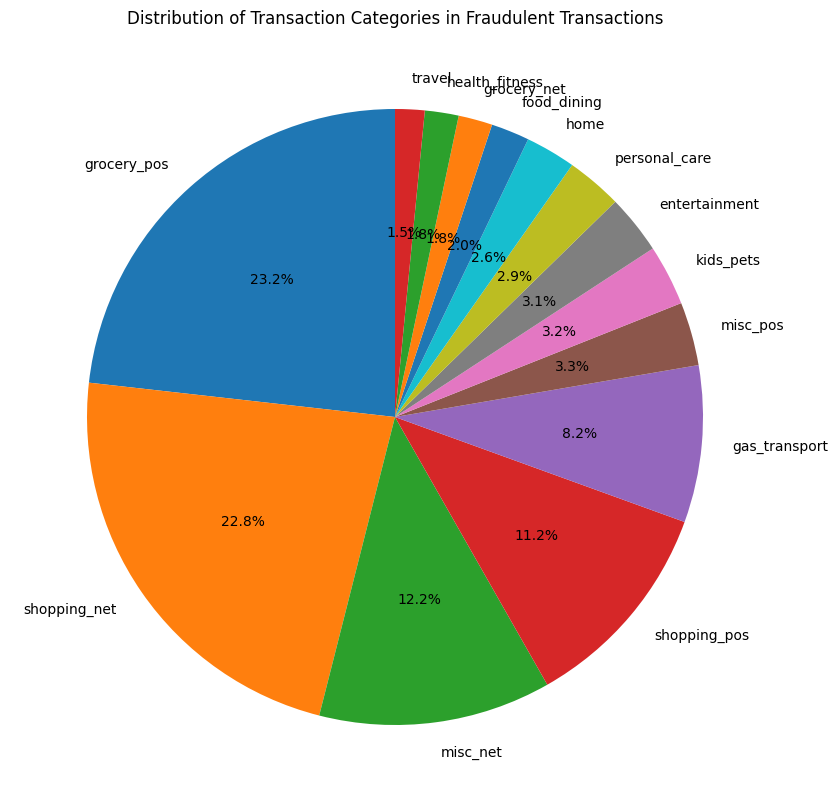

In [36]:
# prompt: pie chart of category with df_fraud

category_counts = df_fraud['category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transaction Categories in Fraudulent Transactions')
plt.show()

## most of the farud happens in
- grocery_pos	1743
- shopping_net	1713
- misc_net	915
- shopping_pos	843
- gas_transport	618

In [39]:
# prompt: sum of amt

total_fraud_amount = df_fraud['amt'].sum()
print(f"Total amount of fraudulent transactions: ${total_fraud_amount:,.2f}")

Total amount of fraudulent transactions: $3,988,088.61


In [44]:
df_NoFraud = df[df['is_fraud'] == 0]

In [46]:
total_not_fraud_amount = df_NoFraud['amt'].sum()
print(f"Total amount of Non fraudulent transactions: ${total_not_fraud_amount:,.2f}")


Total amount of Non fraudulent transactions: $87,234,340.29


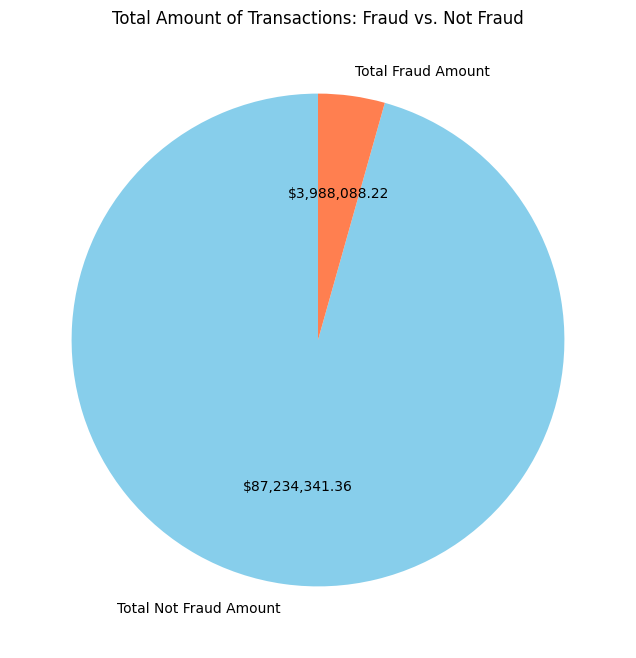

In [48]:
# prompt: pie chert total_not_fraud_amount and total_fraud_amount

total_fraud_amount = df_fraud['amt'].sum()
total_not_fraud_amount = df_NoFraud['amt'].sum()

amount_data = [total_not_fraud_amount, total_fraud_amount]
labels = ['Total Not Fraud Amount', 'Total Fraud Amount']
colors = ['skyblue', 'coral']

plt.figure(figsize=(8, 8))

# Display the pie chart with both percentage and actual values
plt.pie(amount_data, labels=labels, colors=colors, autopct=lambda p: f'${p/100.*sum(amount_data):,.2f}', startangle=90)

plt.title('Total Amount of Transactions: Fraud vs. Not Fraud')
plt.show()

- Total amount of Non fraudulent transactions: $87,234,340.29

- Total amount of fraudulent transactions: $3,988,088.61

